# Latent Dirchlet Allocation


*   Application of LDA to find  latent or hidden “topics” we could use to enrich the
corpus and provide a smarter way to explore and “discover” insights.
*   Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents

*   Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic.

##Import Necessary Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
!pip install wordcloud matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.manifold import TSNE
!pip install scikit-learn matplotlib



##Load the corpus

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving test.dat to test.dat


In [ ]:
#  upload file named
file_name = "test.dat"

# Read the content of the file and store it in a list
with open(file_name, 'r') as file:
    documents = file.readlines()

##Display Top Words for Each Topic


In [ ]:
def display_topics(model, feature_names, no_top_words):
    print('\n - - Display Topics for ', model, ' - - \n')
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]) )

##LDA Model

In [ ]:


# Define the number of features to consider
no_features = 1000  # top 'x' features (words) - decided by tf
k_topics = 46

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=50, min_df=2, max_features=no_features, stop_words='english', token_pattern=r'\b\w{5,}\b')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()


# Run Latent Dirichlet Allocation on the term-document matrix
lda = LatentDirichletAllocation(n_components=k_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)

no_top_words = 4
display_topics(lda, tf_feature_names, no_top_words)



 - - Display Topics for  LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=46, random_state=0)  - - 

Topic 0:
thrombin electrodes sensation sarcoidosis
Topic 1:
99mtc glial 201tl errors
Topic 2:
gastrin carcinoid omeprazole somatostatin
Topic 3:
captopril hepatocyte coated renovascular
Topic 4:
cluster warfarin alcoholics metoprolol
Topic 5:
sucralfate diltiazem ranitidine verapamil
Topic 6:
plate halothane pretreated atropine
Topic 7:
endothelin channels herpes pressor
Topic 8:
transthoracic mucin meningiomas defibrillation
Topic 9:
trigeminal neurofibromatosis sheath shoulder
Topic 10:
axillary recanalization medullary mastectomy
Topic 11:
isradipine vasopressin dystonia malformation
Topic 12:
heterotopic ossification plexus electrophysiological
Topic 13:
cortisol stents polycystic prolactin
Topic 14:
endometriosis cytotoxicity fetoprotein menstrual
Topic 15:
otitis ondansetron shunts metaplasia
Topic 16:
ne

## Term Topic Matrix

In [ ]:
# Access the Term-Topic Matrix
term_topic_matrix = lda.components_

# The Term-Topic Matrix has dimensions (number of terms, number of topics)
num_terms, num_topics = term_topic_matrix.shape

# Display the shape of the Term-Topic Matrix
print(f"Term-Topic Matrix Shape: {num_terms} terms x {num_topics} topics")

# Display the Term-Topic Matrix
print("Term-Topic Matrix:")
print(term_topic_matrix)

Term-Topic Matrix Shape: 75 terms x 2000 topics
Term-Topic Matrix:
[[1.33389458e-02 1.33382494e-02 1.33390015e-02 ... 1.33377204e-02
  1.33387187e-02 1.33378551e-02]
 [1.33382834e-02 1.33372047e-02 1.33381459e-02 ... 1.33379449e-02
  1.33384816e-02 1.33381609e-02]
 [1.33380027e-02 1.33379737e-02 1.33387082e-02 ... 1.33375413e-02
  1.33377667e-02 1.33399043e-02]
 ...
 [1.33375814e-02 1.33384103e-02 1.33377459e-02 ... 1.33383100e-02
  1.33382098e-02 1.33376447e-02]
 [1.33377015e-02 1.33390574e-02 1.33377499e-02 ... 1.00236992e+02
  1.33392055e-02 1.33377246e-02]
 [1.33381835e-02 1.33379009e-02 1.33440207e-02 ... 1.33373755e-02
  1.33375796e-02 1.33388355e-02]]


##Document Topic Matrix

In [ ]:


# Transform document-term matrix into a document-topic matrix
document_topic_matrix = lda.transform(tf)

# The document-topic matrix has dimensions (number of documents, number of topics)
num_documents, num_topics = document_topic_matrix.shape

# Display the shape of the Document-Topic Matrix
print(f"Document-Topic Matrix Shape: {num_documents} documents x {num_topics} topics")

# Explore the matrix -  ex, print the topic distribution for a specific document
document_index = 0
topic_distribution = document_topic_matrix[document_index]
print(f"Topic Distribution for Document {document_index}: {topic_distribution}")

print("Document-Topic Matrix:")
print(document_topic_matrix)

Document-Topic Matrix Shape: 14442 documents x 75 topics
Topic Distribution for Document 0: [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.67111111 0.00444444 0.00444444 0.00444444 0.00444444
 0.00444444 0.00444444 0.00444444]
Document-Topic Matrix:
[[0.00444444 0.00444444 0.00444444 ... 0.00444

##Visual: Document Topic Distribution

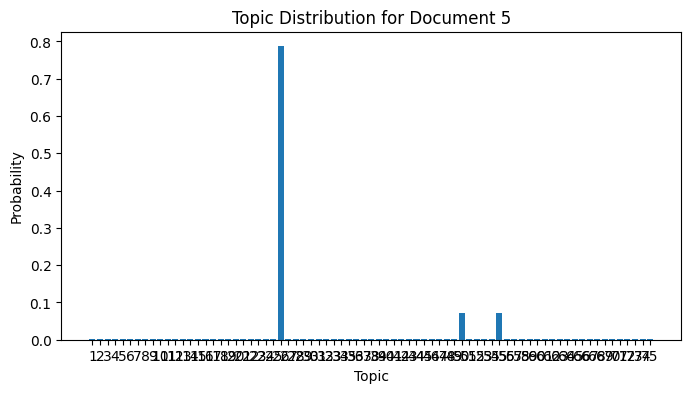

In [ ]:
# Document index
document_index = 5

# Topic distribution for the specified document
topic_distribution = document_topic_matrix[document_index]

# Create a bar chart to visualize the topic distribution
plt.figure(figsize=(8, 4))
plt.bar(range(num_topics), topic_distribution, tick_label=range(1, num_topics + 1))
plt.xlabel("Topic")
plt.ylabel("Probability")
plt.title(f"Topic Distribution for Document {document_index}")
plt.show()


## Visual: Word Cloud

In [ ]:
# Get the top words for each topic
top_words_per_topic = []

for topic_idx, topic in enumerate(lda.components_):
    top_word_indices = topic.argsort()[:-6 - 1:-1]
    top_words = [tf_feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)


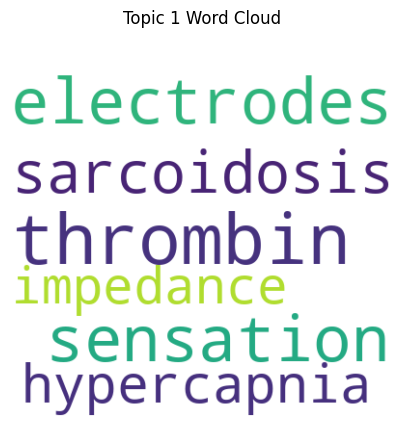

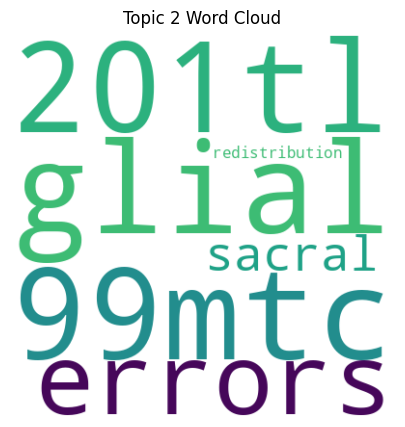

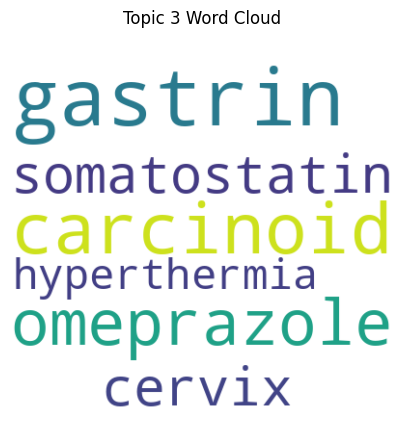

In [ ]:
# Create a word cloud for each topic
for topic_idx, top_words in enumerate(top_words_per_topic[:3]):  # Limit to the top 3 topics
    # Convert the list of words into a single string
    topic_text = " ".join(top_words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(topic_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1} Word Cloud")
    plt.show()


##Visual: t-SNE for Topic Distribution

In [ ]:
# Create a t-SNE model
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the document-topic matrix into a 2D space
topic_coordinates = tsne.fit_transform(document_topic_matrix)


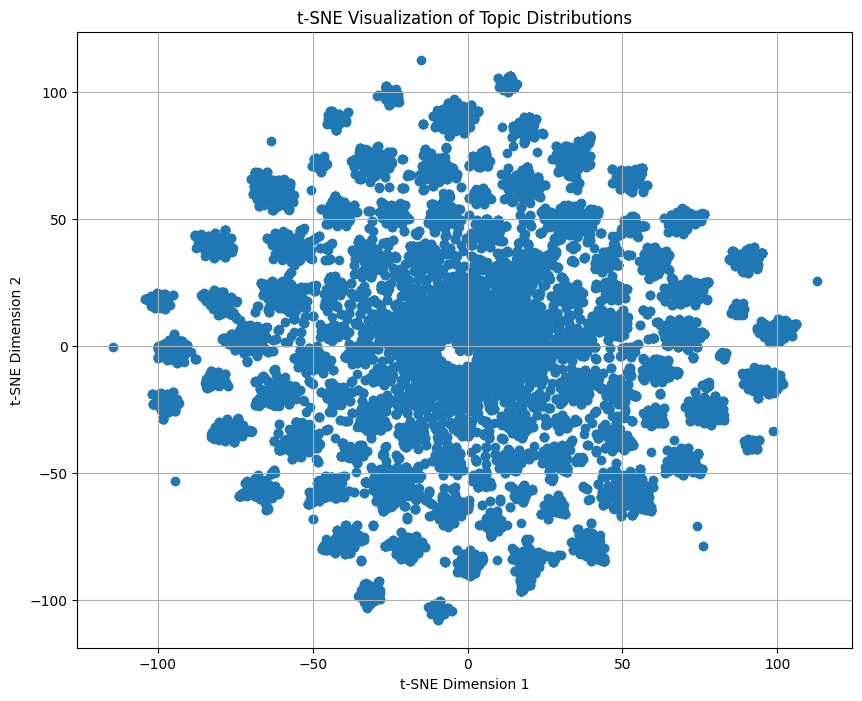

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(topic_coordinates[:, 0], topic_coordinates[:, 1], marker='o')

#  visual elements as needed
plt.title("t-SNE Visualization of Topic Distributions")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()
